# Part 1: Introduction

The description of this dataset can be [found on Kaggle](https://www.kaggle.com/datasets/williecosta/economic-guide-to-college-majors?select=college_majors.csv).

## 1.1 Creating a DataFrame

In [1]:
# getting the data into a dataframe
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

od.download('https://www.kaggle.com/datasets/williecosta/economic-guide-to-college-majors?select=college_majors.csv')

csv: str = './economic-guide-to-college-majors/college_majors.csv' # a string containing a relative link to the data
data = pd.read_csv(csv)

Skipping, found downloaded files in "./economic-guide-to-college-majors" (use force=True to force download)


## 1.2 Viewing the data

In [2]:
data.head(n = 10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,...,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.1450,17,1857,...,264,1449,400,0.1772,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.4414,51,2912,...,296,2482,308,0.0957,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.5357,10,1526,...,553,827,33,0.0212,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.1196,1029,76442,...,13101,54639,4650,0.0573,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.1965,631,61928,...,12695,41413,3895,0.0592,60000,45000,72000,45829,10874,3170


# Part 2: Exporation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

## 2.1 Cleaning the data

Obviously, there's not a lot of work to be done here. I just want to look at changing the column names and making sure we're working with sensible data types.

In [4]:
for name in data.columns:
    print(name)

Rank
Major_code
Major
Total
Men
Women
Major_category
ShareWomen
Sample_size
Employed
Full_time
Part_time
Full_time_year_round
Unemployed
Unemployment_rate
Median
P25th
P75th
College_jobs
Non_college_jobs
Low_wage_jobs


In [5]:
data = data.rename(str.lower, axis = 'columns')

In [6]:
data.describe()

,rank,major_code,total,men,women,sharewomen,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068190,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231203,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030329,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336050,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050300,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534000,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.068000,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703275,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087600,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.969000,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177200,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
data.dtypes

rank                      int64
major_code                int64
major                    object
total                   float64
men                     float64
women                   float64
major_category           object
sharewomen              float64
sample_size               int64
employed                  int64
full_time                 int64
part_time                 int64
full_time_year_round      int64
unemployed                int64
unemployment_rate       float64
median                    int64
p25th                     int64
p75th                     int64
college_jobs              int64
non_college_jobs          int64
low_wage_jobs             int64
dtype: object

In [8]:
data['major_category'].nunique()

16

## 2.2 Subsetting and summarizing the data

In [9]:
# total_comp is short for the total number of students in the major compared to the number of men, then women in the major
total_comp: pd.DataFrame  = data[['major','total', 'men', 'women']]
total_comp.head(n = 15)

,major,total,men,women
0,PETROLEUM ENGINEERING,2339.0,2057.0,282.0
1,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0
2,METALLURGICAL ENGINEERING,856.0,725.0,131.0
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0
4,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0
5,NUCLEAR ENGINEERING,2573.0,2200.0,373.0
6,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0
7,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0
8,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0
9,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0


### 2.2a Overview

<AxesSubplot: ylabel='major'>

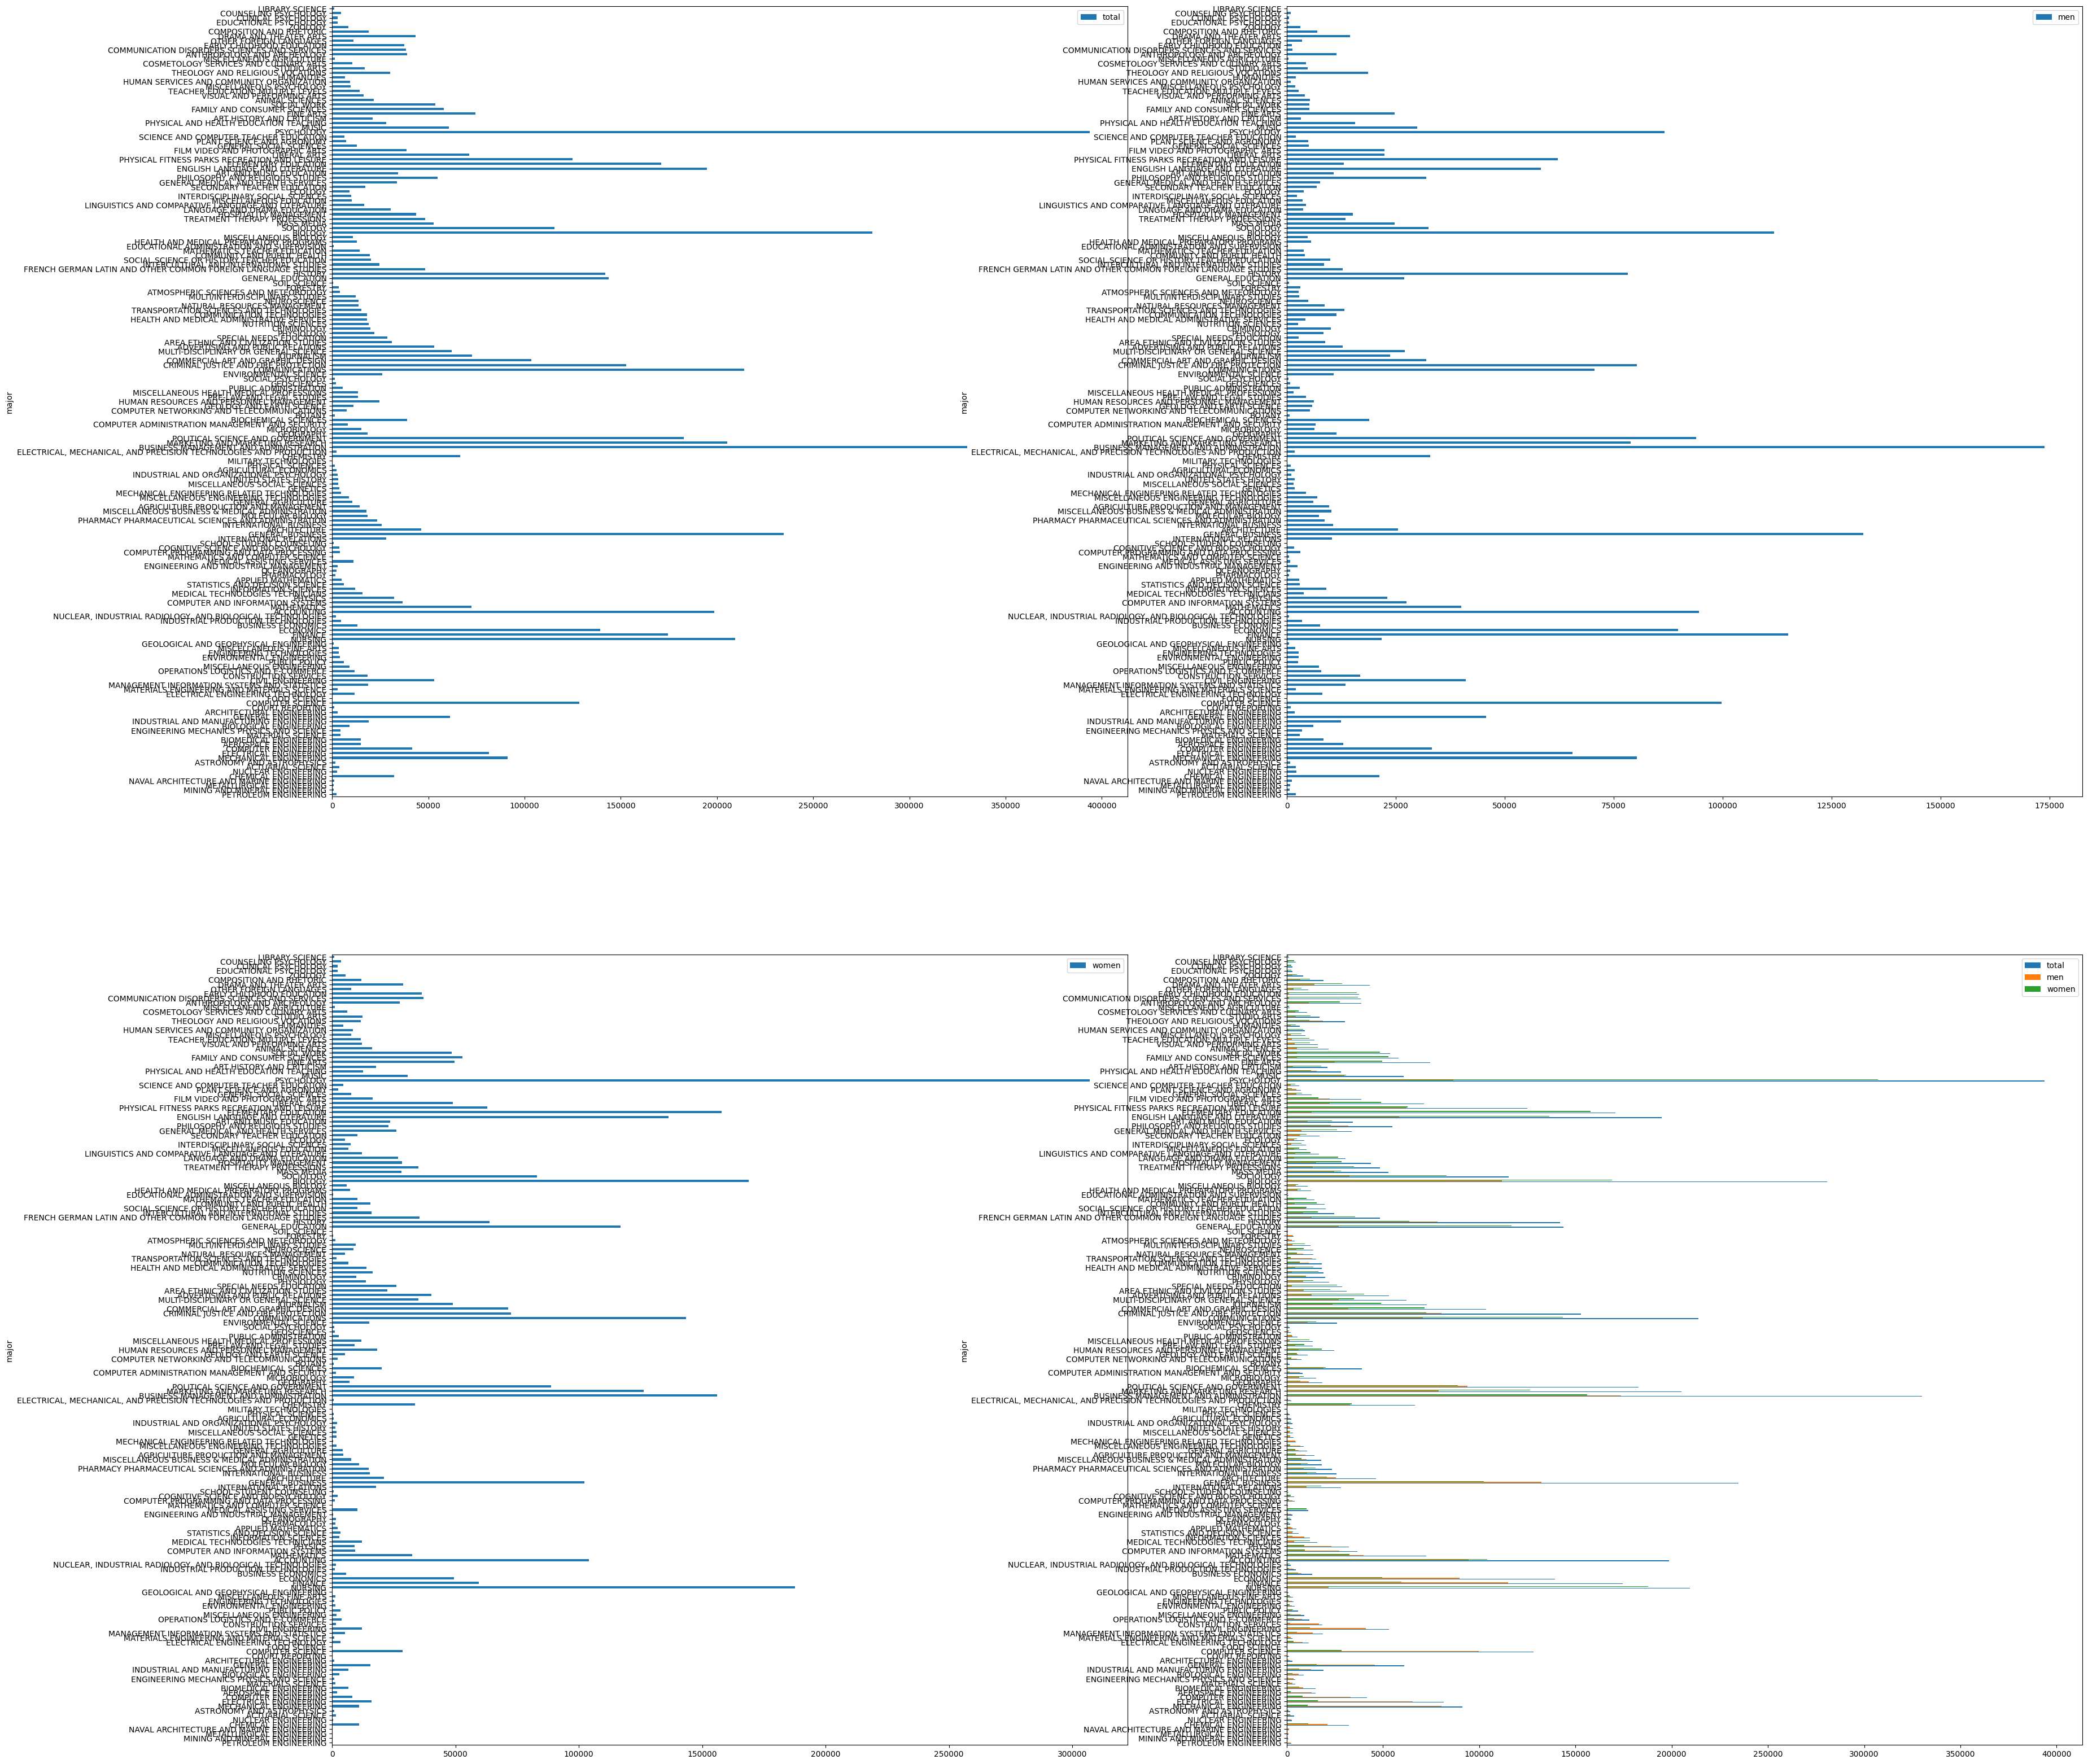

In [10]:
fig, ax = plt.subplots(2, 2)

fig.set_figheight(40)
fig.set_figwidth(40)

total_majors = total_comp[['major', 'total']]
total_men = total_comp[['major', 'men']]
total_women = total_comp[['major', 'women']]

total_majors.plot(x = 'major', kind = 'barh', ax = ax[0, 0])
total_men.plot(x = 'major', kind = 'barh', ax = ax[0, 1])
total_women.plot(x = 'major', kind = 'barh', ax = ax[1, 0])
total_comp.plot(x = 'major', kind = 'barh', ax = ax[1, 1])

As noted above, there is *a lot* of data. To find the top ten majors, we can do this:

### 2.2b Finding the top ten majors

In [11]:
# finding the top ten majors

top_ten_majors = data.sort_values(by = 'total', ascending = False).iloc[:10]
top_ten_majors

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.7799,2584,307933,...,115172,174438,28169,0.0838,31500,24000,41000,125148,141860,48207
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.4732,4212,276234,...,50357,199897,21502,0.0722,38000,29000,50000,36720,148395,32395
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.6019,1370,182295,...,72371,100336,13874,0.0707,33400,24000,45000,88232,81109,28339
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.4363,2380,190183,...,36241,138299,14946,0.0729,40000,30000,55000,29334,100831,27320
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.6700,2394,179633,...,49889,116251,14602,0.0752,35000,27000,45000,40763,97964,27440
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.8960,2554,180903,...,40818,122817,8497,0.0449,48000,39000,58000,151643,26146,6193
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.6157,2684,178862,...,35829,127230,11663,0.0612,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.5242,2042,165527,...,27693,123169,12411,0.0697,45000,34000,56000,11417,39323,10886
137,138,3301,ENGLISH LANGUAGE AND LITERATURE,194673.0,58227.0,136446.0,Humanities & Liberal Arts,0.7009,1436,149180,...,57825,81180,14345,0.0877,32000,23000,41000,57690,71827,26503
78,79,5506,POLITICAL SCIENCE AND GOVERNMENT,182621.0,93880.0,88741.0,Social Science,0.4859,1387,133454,...,43711,83236,15022,0.1012,38000,28000,50000,36854,66947,19803


### 2.2c Top majors by gender

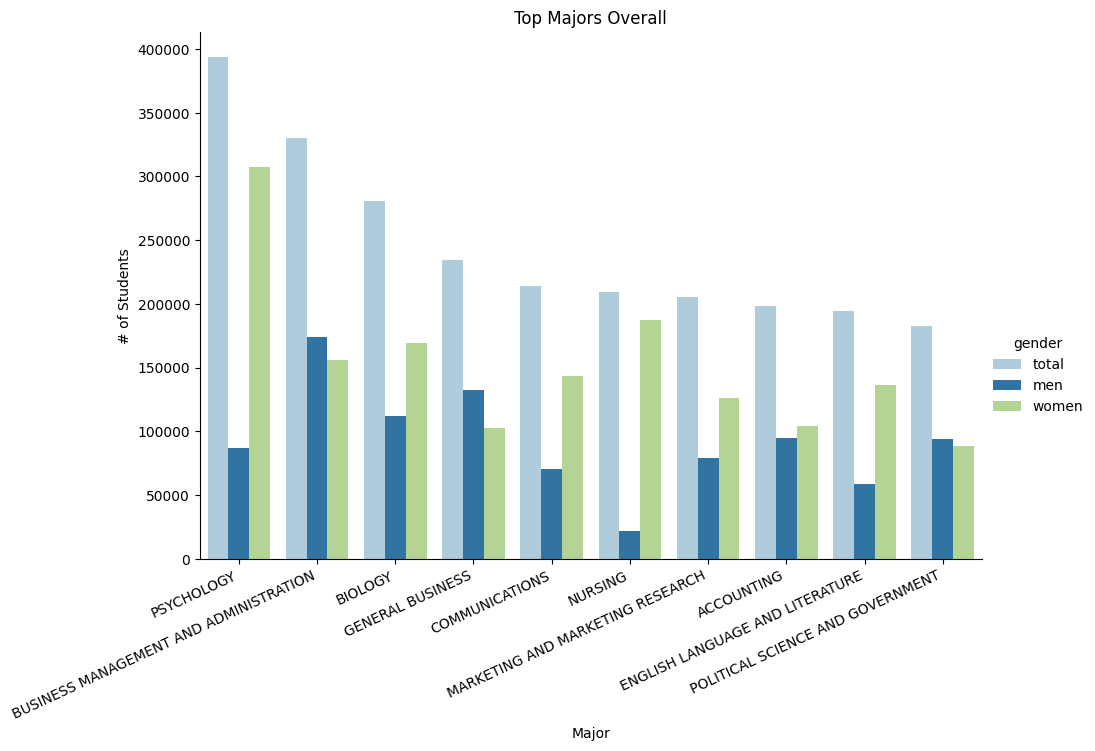

In [12]:
top_majors = top_ten_majors[['major', 'total', 'men', 'women']]
top_majors

top_majors = pd.melt(
    top_majors, 
    id_vars = 'major', 
    var_name = 'gender', 
    value_name = 'total_students')

top_majors

# mp is short for 'majors plot'
mp = sns.catplot(
    data = top_majors, 
    x = 'major', 
    y = 'total_students',
    height = 6,
    aspect = 1.5,
    hue = 'gender',
    palette = 'Paired',
    kind = 'bar')

mp.set_xticklabels(
    rotation = 25,  
    horizontalalignment = 'right')

mp.set(title = 'Top Majors Overall', xlabel = 'Major', ylabel = '# of Students')

### 2.2d Top major categories by gender (based on top majors)

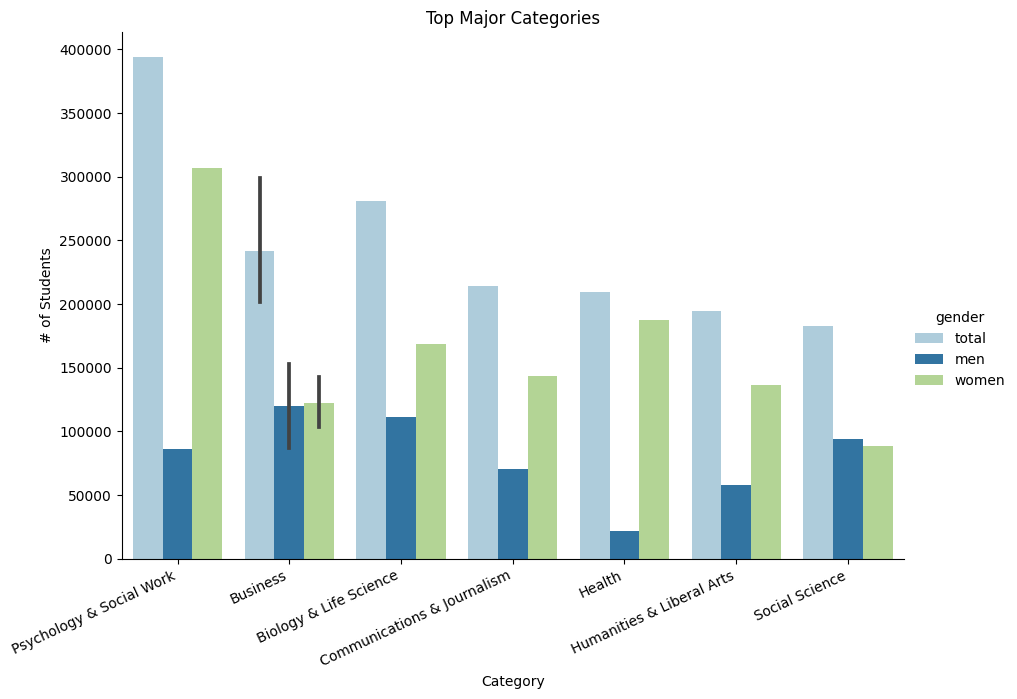

In [13]:
# see if the categories of the top majors are in line with the majors themselves
top_categories = top_ten_majors[['total', 'men', 'women', 'major_category']]
top_categories

top_categories = pd.melt(
    top_categories,
    id_vars = 'major_category',
    var_name = 'gender',
    value_name = 'total_students')

top_categories

# mc is short for 'major categories plot'
mc = sns.catplot(
    data = top_categories,
    x = 'major_category',
    y = 'total_students',
    height = 6,
    aspect = 1.5,
    hue = 'gender',
    palette = 'Paired',
    kind = 'bar')

mc.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

mc.set(title = 'Top Major Categories', xlabel = 'Category', ylabel = '# of Students')

### 2.2e Top major categories

In [14]:
categories_top = data.sort_values(by = 'major_category', ascending = False).iloc[:10]
categories_top['major_category'].nunique

<bound method IndexOpsMixin.nunique of 56               Social Science
102              Social Science
68               Social Science
124              Social Science
142              Social Science
36               Social Science
78               Social Science
79               Social Science
131              Social Science
145    Psychology & Social Work
Name: major_category, dtype: object>

### 2.2f Top majors for women

In [15]:
# we'll do the same for women, then men
top_majors_women = data.sort_values(by = 'women', ascending = False).iloc[:10]
top_majors_women

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.7799,2584,307933,...,115172,174438,28169,0.0838,31500,24000,41000,125148,141860,48207
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.8960,2554,180903,...,40818,122817,8497,0.0449,48000,39000,58000,151643,26146,6193
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.6019,1370,182295,...,72371,100336,13874,0.0707,33400,24000,45000,88232,81109,28339
138,139,2304,ELEMENTARY EDUCATION,170862.0,13029.0,157833.0,Education,0.9237,1629,149339,...,37965,86540,7297,0.0466,32000,23400,38000,108085,36972,11502
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.4732,4212,276234,...,50357,199897,21502,0.0722,38000,29000,50000,36720,148395,32395
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.6700,2394,179633,...,49889,116251,14602,0.0752,35000,27000,45000,40763,97964,27440
137,138,3301,ENGLISH LANGUAGE AND LITERATURE,194673.0,58227.0,136446.0,Humanities & Liberal Arts,0.7009,1436,149180,...,57825,81180,14345,0.0877,32000,23000,41000,57690,71827,26503
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.6157,2684,178862,...,35829,127230,11663,0.0612,38000,30000,50000,25320,93889,27968
113,114,2300,GENERAL EDUCATION,143718.0,26893.0,116825.0,Education,0.8129,919,118241,...,29558,73531,7195,0.0574,34000,26000,41000,82007,31112,11443
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.5242,2042,165527,...,27693,123169,12411,0.0697,45000,34000,56000,11417,39323,10886


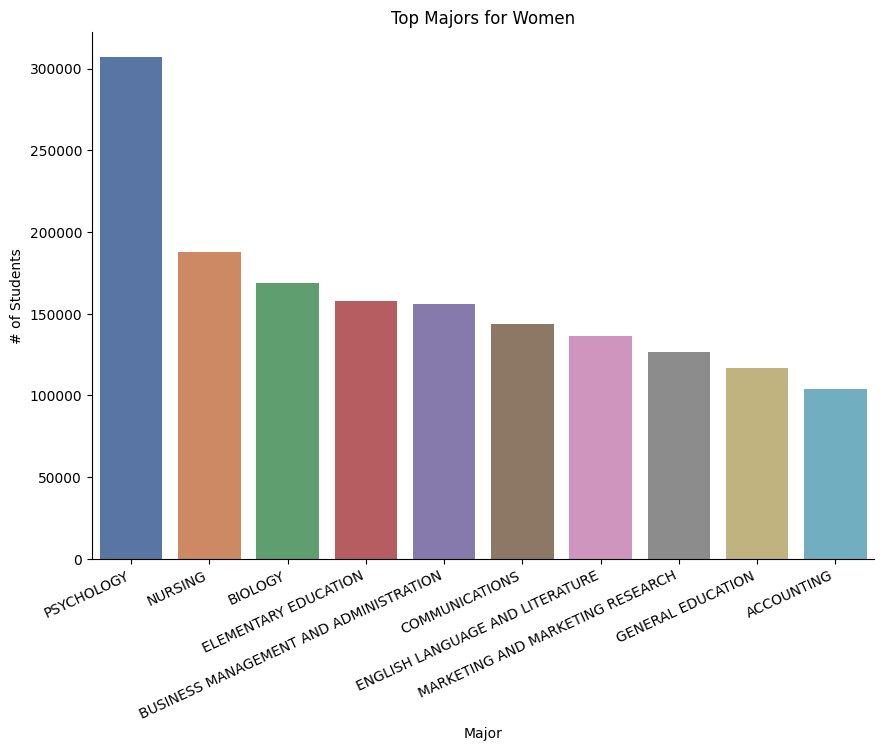

In [16]:
womens_top = top_majors_women[['major', 'women']]

# wm is short for 'womens top major plot'
wm = sns.catplot(
    data = womens_top,
    x = 'major',
    y = 'women',
    height = 6,
    aspect = 1.5,
    palette = 'deep',
    kind = 'bar')

wm.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

wm.set(title = 'Top Majors for Women', xlabel = 'Major', ylabel = '# of Students')

### 2.2g Top major categories for women

In [17]:
top_majors_women[['major_category', 'women']]

,major_category,women
145,Psychology & Social Work,307087.0
34,Health,187621.0
123,Biology & Life Science,168947.0
138,Education,157833.0
76,Business,156118.0
93,Communications & Journalism,143377.0
137,Humanities & Liberal Arts,136446.0
77,Business,126354.0
113,Education,116825.0
40,Business,104114.0


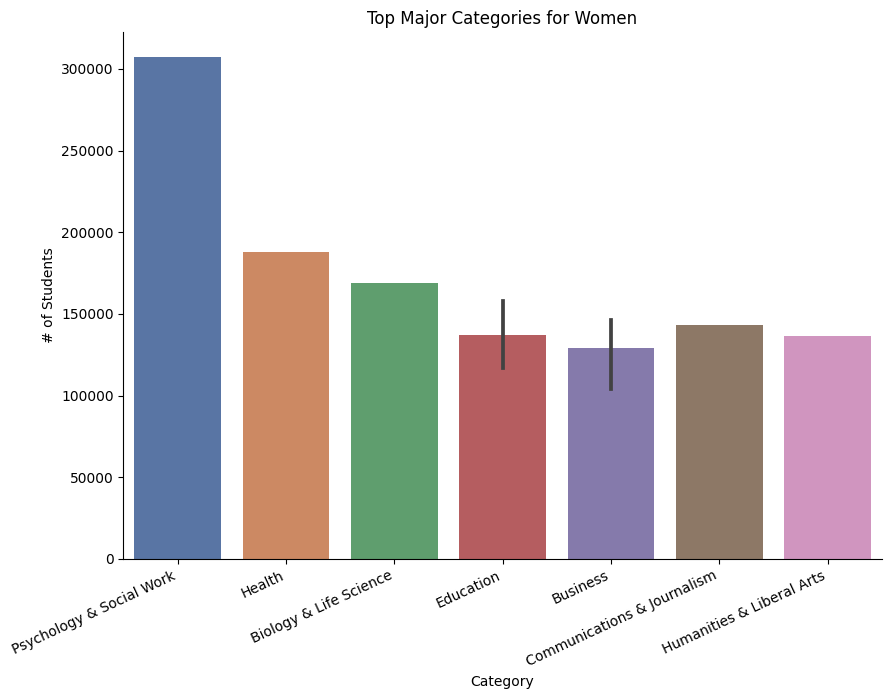

In [18]:
cat_womens_top = top_majors_women[['major_category', 'women']]
cat_womens_top

# cw is short for 'womens top major category plot'
cw = sns.catplot(
    data = cat_womens_top,
    x = 'major_category',
    y = 'women',
    height = 6,
    aspect = 1.5,
    palette = 'deep',
    kind = 'bar')

cw.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

cw.set(title = 'Top Major Categories for Women', xlabel = 'Category', ylabel = '# of Students')

### 2.2h Top majors and categories for men

In [19]:
top_majors_men = data.sort_values(by = 'men', ascending = False).iloc[:10]
top_majors_men

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.4732,4212,276234,...,50357,199897,21502,0.0722,38000,29000,50000,36720,148395,32395
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.4363,2380,190183,...,36241,138299,14946,0.0729,40000,30000,55000,29334,100831,27320
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.3408,2189,145696,...,21463,108595,9413,0.0607,47000,35000,64000,24243,48447,9910
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.6019,1370,182295,...,72371,100336,13874,0.0707,33400,24000,45000,88232,81109,28339
20,21,2102,COMPUTER SCIENCE,128319.0,99743.0,28576.0,Computers & Mathematics,0.2227,1196,102087,...,18726,70932,6884,0.0632,53000,39000,70000,68622,25667,5144
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.5242,2042,165527,...,27693,123169,12411,0.0697,45000,34000,56000,11417,39323,10886
78,79,5506,POLITICAL SCIENCE AND GOVERNMENT,182621.0,93880.0,88741.0,Social Science,0.4859,1387,133454,...,43711,83236,15022,0.1012,38000,28000,50000,36854,66947,19803
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.3555,1322,104117,...,25325,70740,11452,0.0991,47000,35000,65000,25582,37057,10653
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.7799,2584,307933,...,115172,174438,28169,0.0838,31500,24000,41000,125148,141860,48207
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.1196,1029,76442,...,13101,54639,4650,0.0573,60000,48000,70000,52844,16384,3253


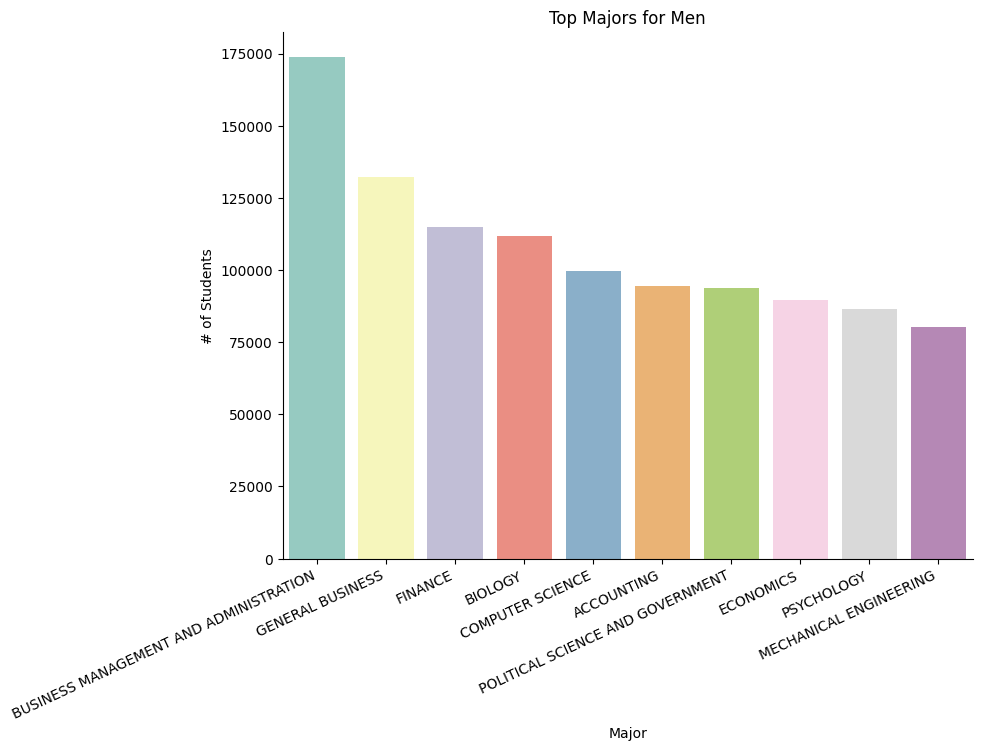

In [20]:
mens_top = top_majors_men[['major', 'men']]
mens_top

# mm is for the top majors for men
mm = sns.catplot(
    mens_top,
    x = 'major',
    y = 'men',
    height = 6,
    aspect = 1.5,
    palette = 'Set3',
    kind = 'bar')

mm.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

mm.set(title = 'Top Majors for Men', xlabel = 'Major', ylabel = '# of Students')

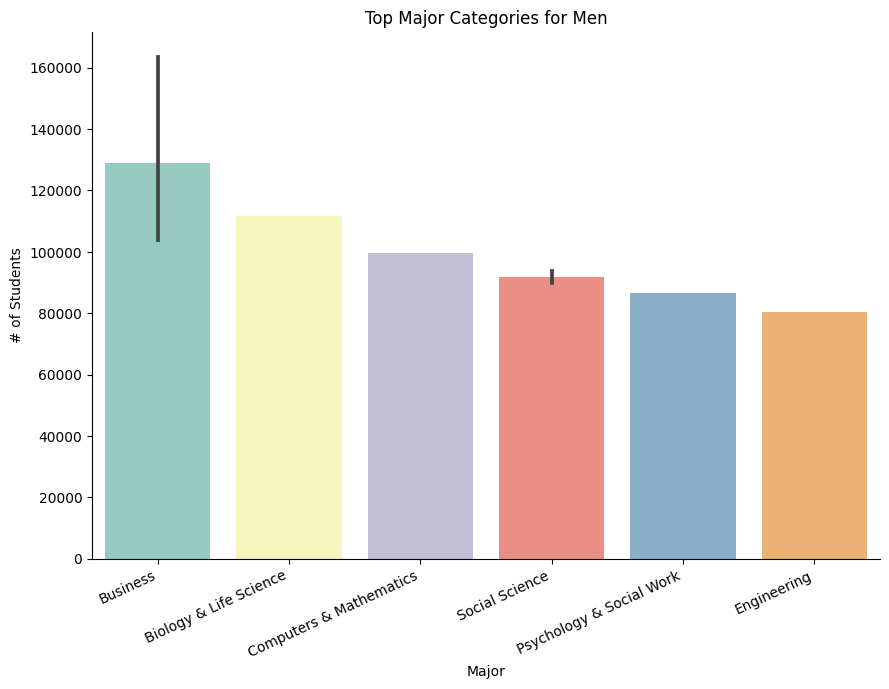

In [21]:
cat_mens = top_majors_men[['major_category', 'men']]
cat_mens

# cm is for mens major category
cm = sns.catplot(
    cat_mens,
    x = 'major_category',
    y = 'men',
    height = 6,
    aspect = 1.5,
    palette = 'Set3',
    kind = 'bar')

cm.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

cm.set(title = 'Top Major Categories for Men', xlabel = 'Major', ylabel = '# of Students')

## 2.3 Subsetting and summarizing, part 2 

### 2.3a Finding the bottom ten majors, then categories

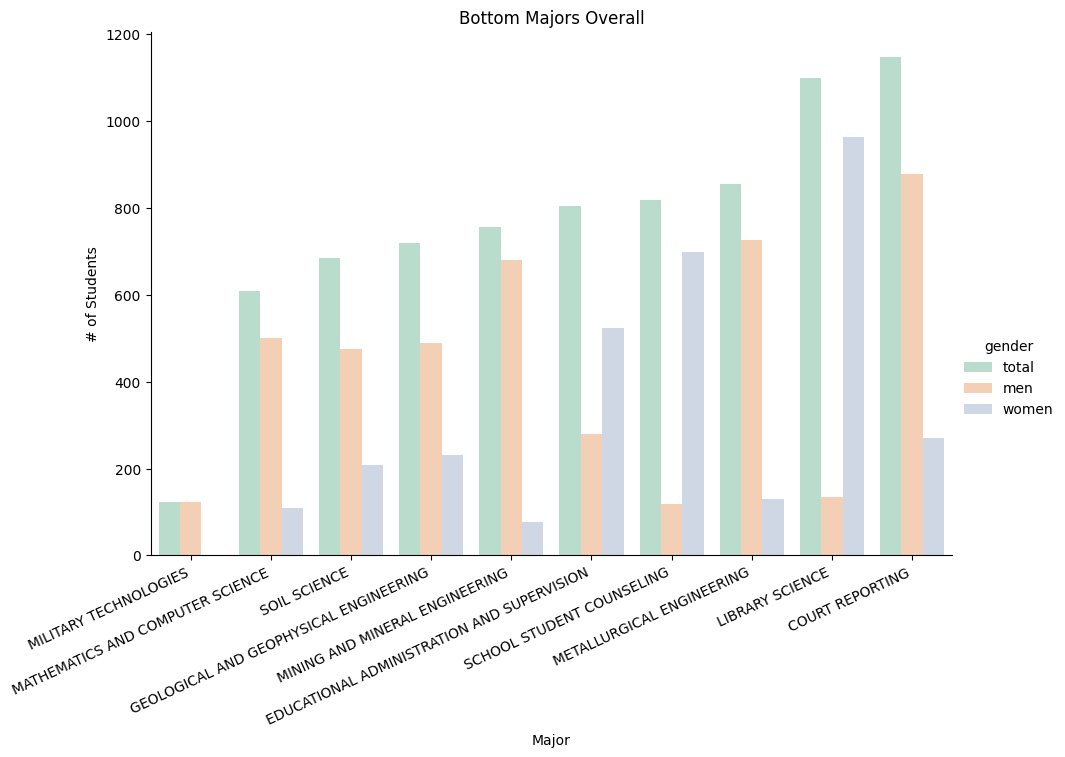

In [22]:
bottom_ten_majors  = data.sort_values(by = 'total').iloc[:10]
bottom_majors = bottom_ten_majors[['major', 'total', 'men', 'women']]
bottom_majors

bottom_majors = pd.melt(
    bottom_majors,
    id_vars = 'major',
    var_name = 'gender',
    value_name = 'total_students')

bottom_majors

# bm is for bottom majors
bm = sns.catplot(
    data = bottom_majors, 
    x = 'major', 
    y = 'total_students',
    height = 6,
    aspect = 1.5,
    hue = 'gender',
    palette = 'Pastel2',
    kind = 'bar')

bm.set_xticklabels(
    rotation = 25,  
    horizontalalignment = 'right')

bm.set(title = 'Bottom Majors Overall', xlabel = 'Major', ylabel = '# of Students')

In [23]:
bottom_categories = bottom_ten_majors[['major_category', 'total', 'men', 'women']]
bottom_categories

,major_category,total,men,women
73,Industrial Arts & Consumer Services,124.0,124.0,0.0
52,Computers & Mathematics,609.0,500.0,109.0
112,Agriculture & Natural Resources,685.0,476.0,209.0
33,Engineering,720.0,488.0,232.0
1,Engineering,756.0,679.0,77.0
120,Education,804.0,280.0,524.0
55,Education,818.0,119.0,699.0
2,Engineering,856.0,725.0,131.0
172,Education,1098.0,134.0,964.0
19,Law & Public Policy,1148.0,877.0,271.0


In [24]:
bottom_categories = pd.melt(
    bottom_categories,
    id_vars = 'major_category',
    var_name = 'gender',
    value_name = 'total_students')

bottom_categories

,major_category,gender,total_students
0,Industrial Arts & Consumer Services,total,124.0
1,Computers & Mathematics,total,609.0
2,Agriculture & Natural Resources,total,685.0
3,Engineering,total,720.0
4,Engineering,total,756.0
5,Education,total,804.0
6,Education,total,818.0
7,Engineering,total,856.0
8,Education,total,1098.0
9,Law & Public Policy,total,1148.0


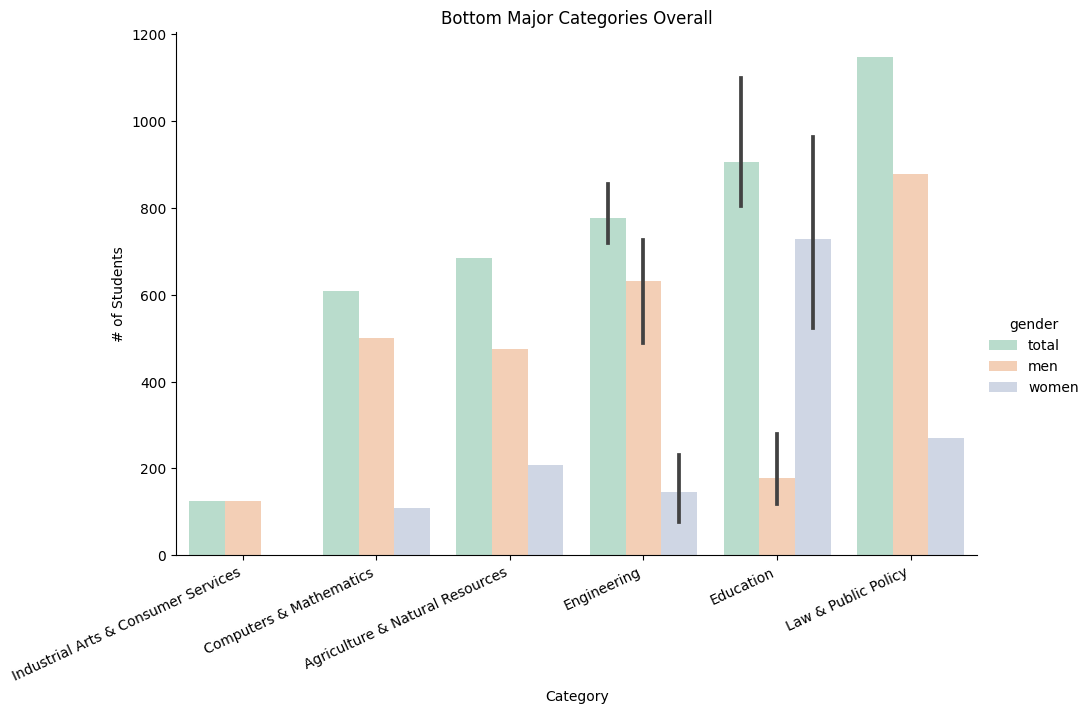

In [35]:
# bc is short for 'bottom ten major categories plot'
bc = sns.catplot(
    data = bottom_categories, 
    x = 'major_category',
    y = 'total_students',
    height = 6,
    aspect = 1.5,
    hue = 'gender',
    palette = 'Pastel2',
    kind = 'bar')

bc.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

bc.set(title = 'Bottom Major Categories Overall', xlabel = 'Category', ylabel = '# of Students')

### 2.3b Finding the bottom ten majors and categories for women

In [26]:
bottom_majors_women = data.sort_values(by = 'women').iloc[:10]
bottom_majors_women

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0000,4,0,...,0,111,0,0.0000,40000,40000,40000,0,0,0
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.1790,7,559,...,0,391,0,0.0000,42000,30000,78000,452,67,25
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.3051,4,613,...,185,383,0,0.0000,35000,18500,44000,355,144,0
33,34,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,488.0,232.0,Engineering,0.3222,5,604,...,126,396,49,0.0750,50000,42800,57000,501,50,49
19,20,3201,COURT REPORTING,1148.0,877.0,271.0,Law & Public Policy,0.2361,14,930,...,223,808,11,0.0117,54000,50000,54000,402,528,144
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
66,67,2504,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,4790.0,4419.0,371.0,Engineering,0.0775,71,4186,...,247,3607,250,0.0564,40000,27000,52000,1861,2121,406


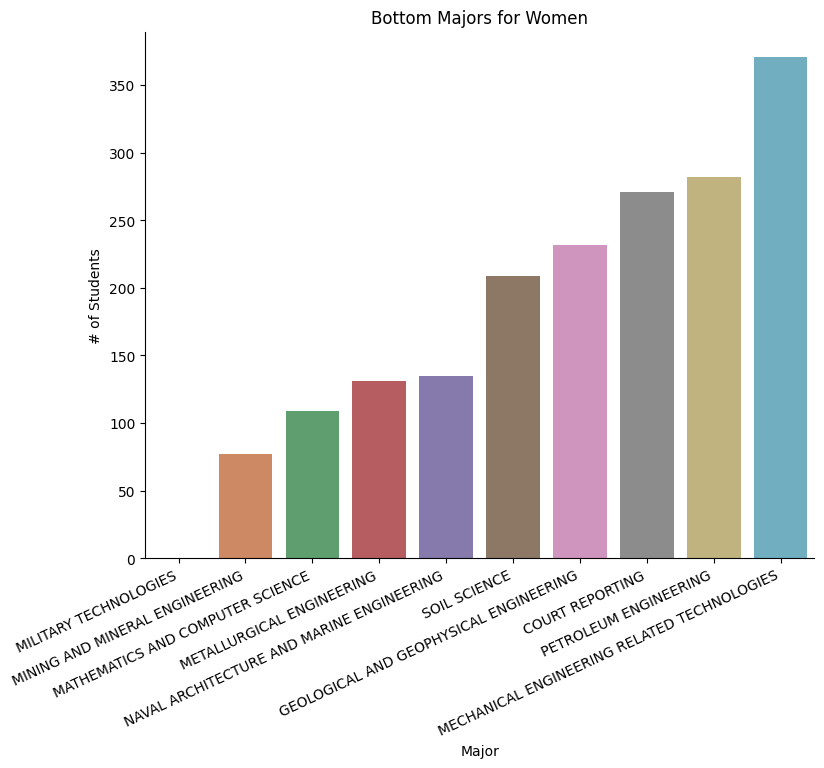

In [33]:
bottom_womens = bottom_majors_women[['major', 'women']]

# bw is short for 'womens bottom ten major plot'
bw = sns.catplot(
    data = bottom_womens,
    x = 'major',
    y = 'women',
    height = 6,
    aspect = 1.5,
    palette = 'deep',
    kind = 'bar')

bw.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

bw.set(title = 'Bottom Majors for Women', xlabel = 'Major', ylabel = '# of Students')

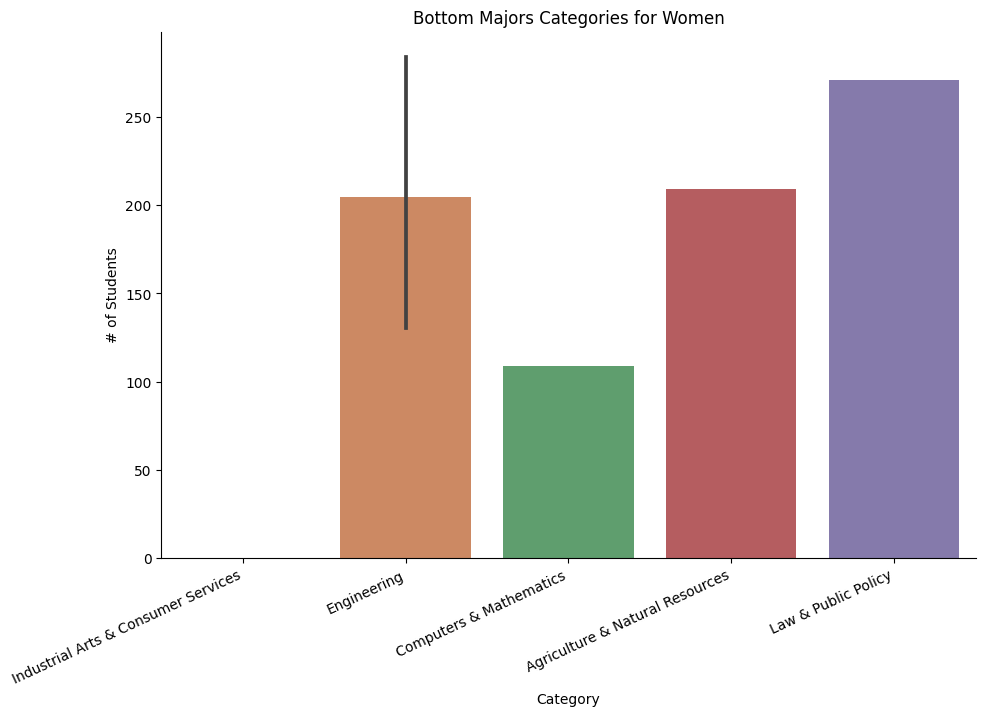

In [34]:
bottom_cat_womens = bottom_majors_women[['major_category', 'women']]
bottom_cat_womens

# bcw is short for 'womens top major category plot'
bcw = sns.catplot(
    data = bottom_cat_womens,
    x = 'major_category',
    y = 'women',
    height = 6,
    aspect = 1.5,
    palette = 'deep',
    kind = 'bar')

bcw.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

bcw.set(title = 'Bottom Majors Categories for Women', xlabel = 'Category', ylabel = '# of Students')

### 2.3c Finding the bottom ten majors and categories for men

In [29]:
bottom_majors_men = data.sort_values(by = 'men').iloc[:10]
bottom_majors_men

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.8545,4,730,...,135,545,88,0.1076,41000,41000,43000,509,221,0
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0000,4,0,...,0,111,0,0.0000,40000,40000,40000,0,0,0
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.8780,2,742,...,237,410,87,0.1049,22000,20000,22000,288,338,192
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.6517,5,703,...,0,504,0,0.0000,34000,29000,35000,346,206,111
161,162,1199,MISCELLANEOUS AGRICULTURE,1488.0,404.0,1084.0,Agriculture & Natural Resources,0.7285,24,1290,...,335,936,82,0.0598,29000,23000,42100,483,626,31
91,92,5206,SOCIAL PSYCHOLOGY,1386.0,413.0,973.0,Psychology & Social Work,0.7020,8,1080,...,433,529,33,0.0296,36000,34000,45000,434,593,37
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.3051,4,613,...,185,383,0,0.0000,35000,18500,44000,355,144,0
33,34,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,488.0,232.0,Engineering,0.3222,5,604,...,126,396,49,0.0750,50000,42800,57000,501,50,49
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.1790,7,559,...,0,391,0,0.0000,42000,30000,78000,452,67,25
48,49,3607,PHARMACOLOGY,1762.0,515.0,1247.0,Biology & Life Science,0.7077,3,1144,...,532,565,107,0.0855,45000,40000,45000,603,478,93


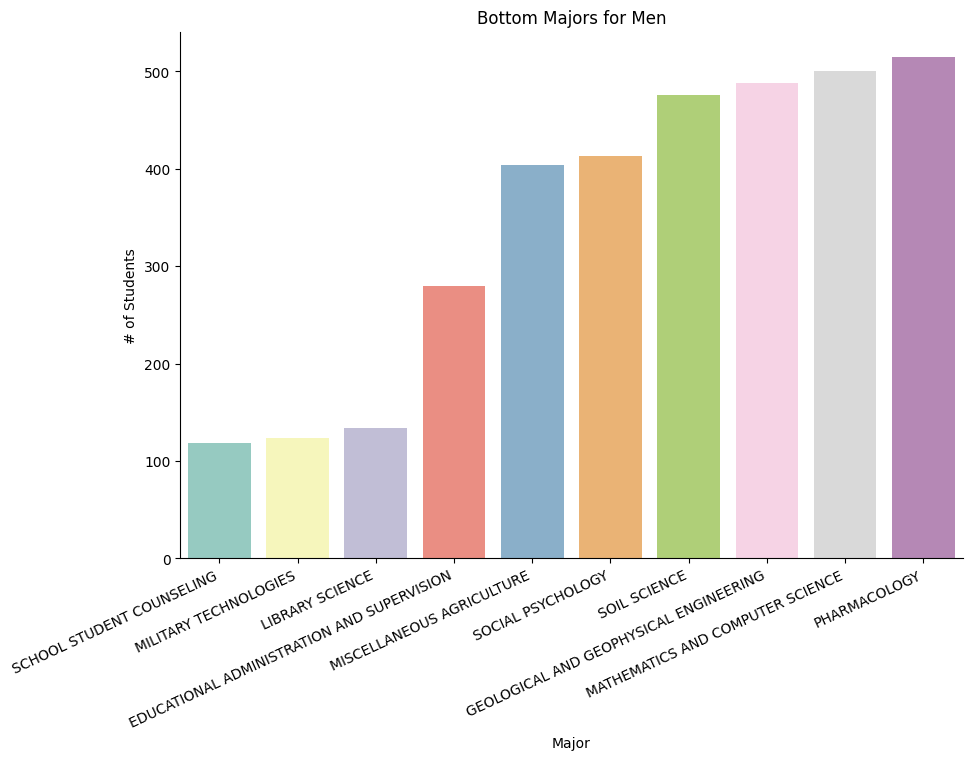

In [36]:
bottom_mens = bottom_majors_men[['major', 'men']]
bottom_mens

# mm is for the top majors for men
bm = sns.catplot(
    bottom_mens,
    x = 'major',
    y = 'men',
    height = 6,
    aspect = 1.5,
    palette = 'Set3',
    kind = 'bar')

bm.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

bm.set(title = 'Bottom Majors for Men', xlabel = 'Major', ylabel = '# of Students')

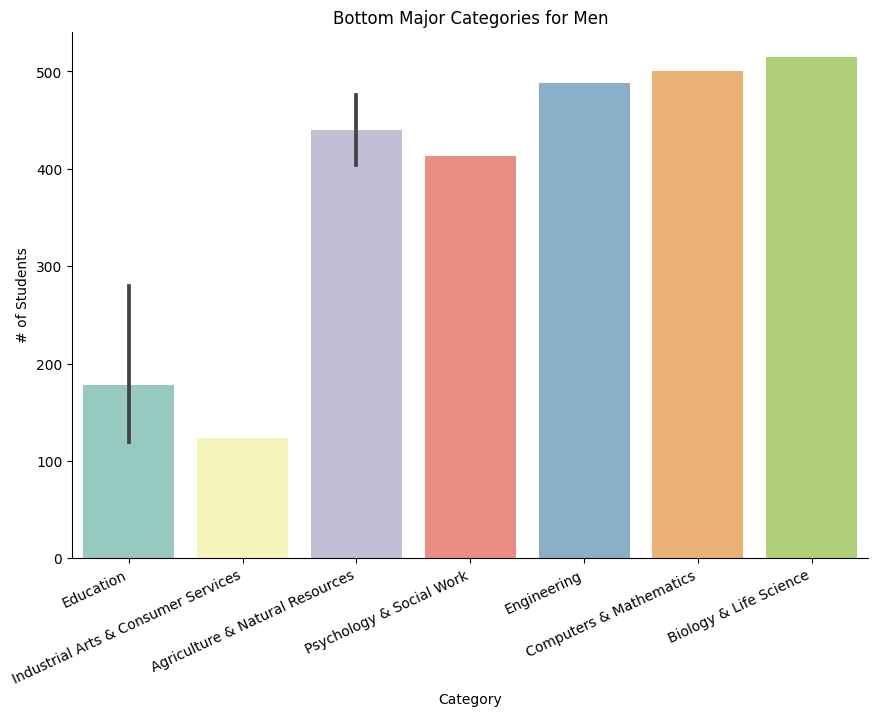

In [37]:
bottom_cat_mens = bottom_majors_men[['major_category', 'men']]
bottom_cat_mens

# bcm is for bottom ten mens major category
bcm = sns.catplot(
    bottom_cat_mens,
    x = 'major_category',
    y = 'men',
    height = 6,
    aspect = 1.5,
    palette = 'Set3',
    kind = 'bar')

bcm.set_xticklabels(
    rotation = 25,
    horizontalalignment = 'right')

bcm.set(title = 'Bottom Major Categories for Men', xlabel = 'Category', ylabel = '# of Students')

## 2.4 Subsetting and Analyzing the data

[Text(0.5, 1.0, 'Share of Women Graduated by Major Category'),
 Text(0.5, 0, 'Category'),
 Text(0, 0.5, '% of Women')]

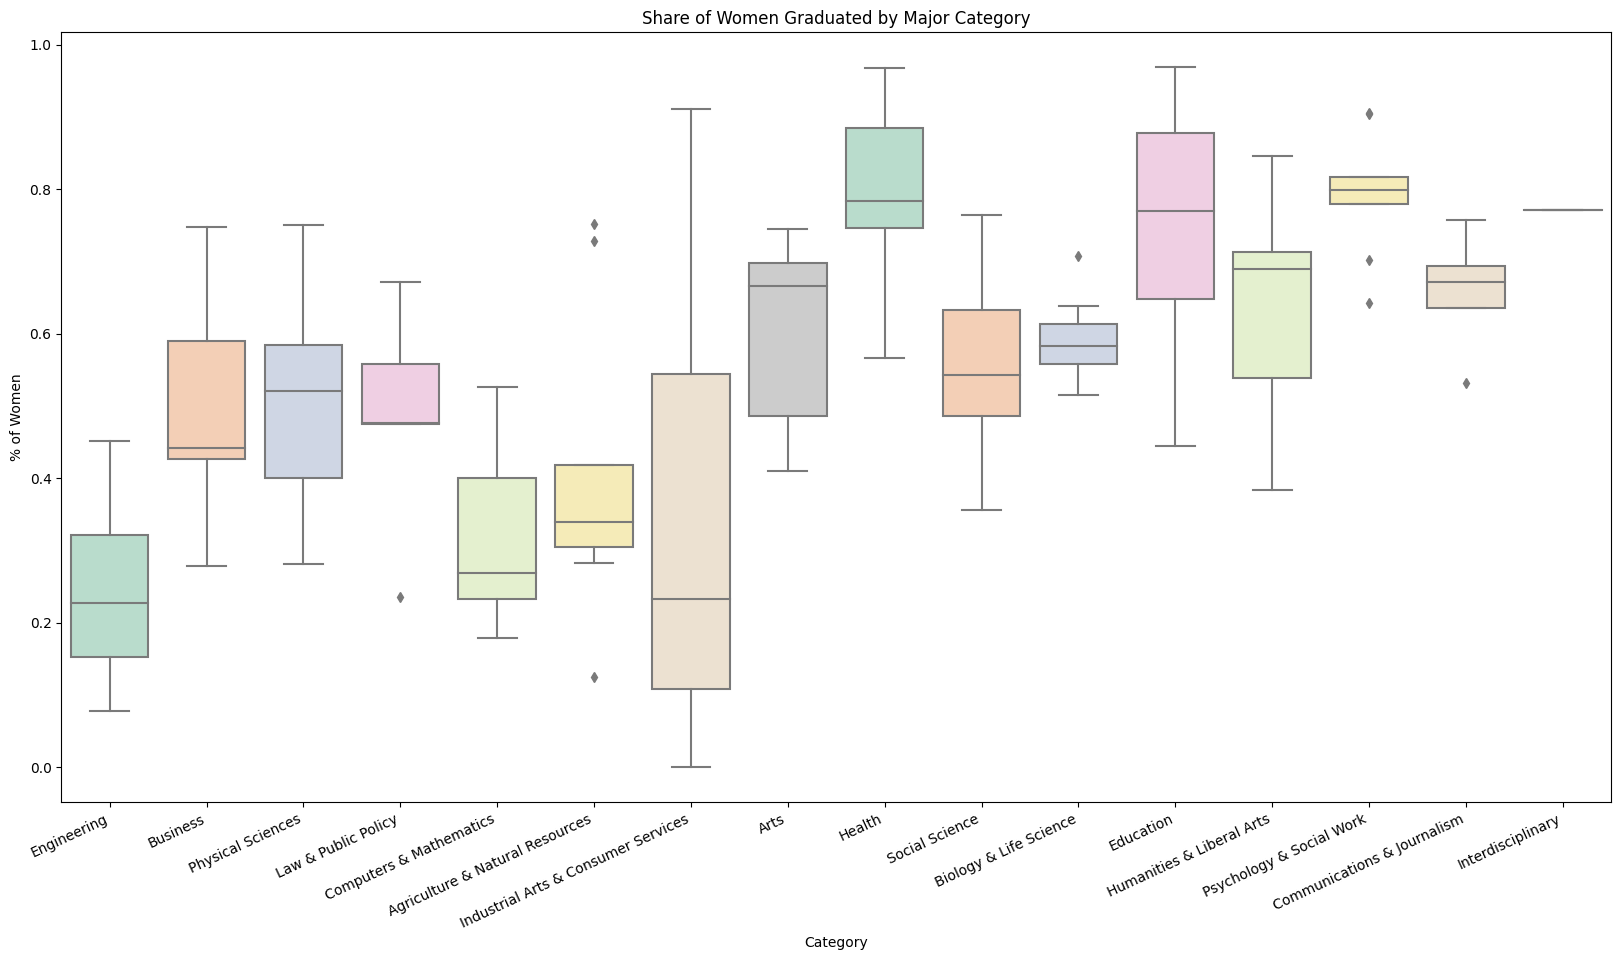

In [40]:
women_graduates = data[['major', 'major_category', 'sharewomen']]
women_graduates

fig, ax = plt.subplots(1, 1)
fig.set_figheight(10)
fig.set_figwidth(20)

wg_cat = sns.boxplot(
    women_graduates,
    x = 'major_category', 
    y = 'sharewomen',
    palette = 'Pastel2',
    ax = ax)

wg_cat.set_xticklabels(
    labels = wg_cat.get_xticklabels(),
    rotation = 25,
    horizontalalignment = 'right')

wg_cat.set(title = 'Share of Women Graduated by Major Category', xlabel = 'Category', ylabel = '% of Women')